In [5]:
#pip install yfinance

In [4]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
#Microsoft

stock = "MSFT"

data = yf.Ticker(stock)
data = data.history(period="max")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054188,0.062156,0.054188,0.059500,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.059500,0.062688,0.059500,0.061625,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.061625,0.063219,0.061625,0.062688,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.062688,0.063219,0.060562,0.061093,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061093,0.061625,0.059500,0.060031,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-26 00:00:00-04:00,504.359985,504.980011,498.510010,502.040009,30835700,0.0,0.0
2025-08-27 00:00:00-04:00,502.000000,507.290009,499.899994,506.739990,17277900,0.0,0.0
2025-08-28 00:00:00-04:00,507.089996,511.089996,505.500000,509.640015,18015600,0.0,0.0


In [7]:
data.index

DatetimeIndex(['1986-03-13 00:00:00-05:00', '1986-03-14 00:00:00-05:00',
               '1986-03-17 00:00:00-05:00', '1986-03-18 00:00:00-05:00',
               '1986-03-19 00:00:00-05:00', '1986-03-20 00:00:00-05:00',
               '1986-03-21 00:00:00-05:00', '1986-03-24 00:00:00-05:00',
               '1986-03-25 00:00:00-05:00', '1986-03-26 00:00:00-05:00',
               ...
               '2025-08-19 00:00:00-04:00', '2025-08-20 00:00:00-04:00',
               '2025-08-21 00:00:00-04:00', '2025-08-22 00:00:00-04:00',
               '2025-08-25 00:00:00-04:00', '2025-08-26 00:00:00-04:00',
               '2025-08-27 00:00:00-04:00', '2025-08-28 00:00:00-04:00',
               '2025-08-29 00:00:00-04:00', '2025-09-02 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=9945, freq=None)

<Axes: xlabel='Date'>

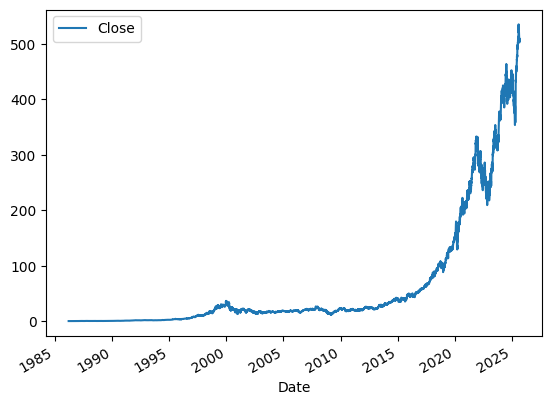

In [8]:
#plot close market throught the year

data.plot.line(y="Close", use_index=True)

In [9]:
#explain use chatgpt
#get ride of useless and null data

del data["Dividends"]
del data["Stock Splits"]
data.dropna(inplace= True)
data.index = data.index.date
data.index.name = "Date"

In [10]:
data

,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13,0.054188,0.062156,0.054188,0.059500,1031788800
1986-03-14,0.059500,0.062688,0.059500,0.061625,308160000
1986-03-17,0.061625,0.063219,0.061625,0.062688,133171200
1986-03-18,0.062688,0.063219,0.060562,0.061093,67766400
1986-03-19,0.061093,0.061625,0.059500,0.060031,47894400
...,...,...,...,...,...
2025-08-26,504.359985,504.980011,498.510010,502.040009,30835700
2025-08-27,502.000000,507.290009,499.899994,506.739990,17277900
2025-08-28,507.089996,511.089996,505.500000,509.640015,18015600


In [11]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Volume
0,1986-03-13,0.054188,0.062156,0.054188,0.059500,1031788800
1,1986-03-14,0.059500,0.062688,0.059500,0.061625,308160000
2,1986-03-17,0.061625,0.063219,0.061625,0.062688,133171200
3,1986-03-18,0.062688,0.063219,0.060562,0.061093,67766400
4,1986-03-19,0.061093,0.061625,0.059500,0.060031,47894400
...,...,...,...,...,...,...
9940,2025-08-26,504.359985,504.980011,498.510010,502.040009,30835700
9941,2025-08-27,502.000000,507.290009,499.899994,506.739990,17277900
9942,2025-08-28,507.089996,511.089996,505.500000,509.640015,18015600
9943,2025-08-29,508.660004,509.600006,504.489990,506.690002,20961600


In [12]:
#mouving average

ma_100_days= data.Close.rolling(100).mean()
ma_200_days= data.Close.rolling(200).mean()

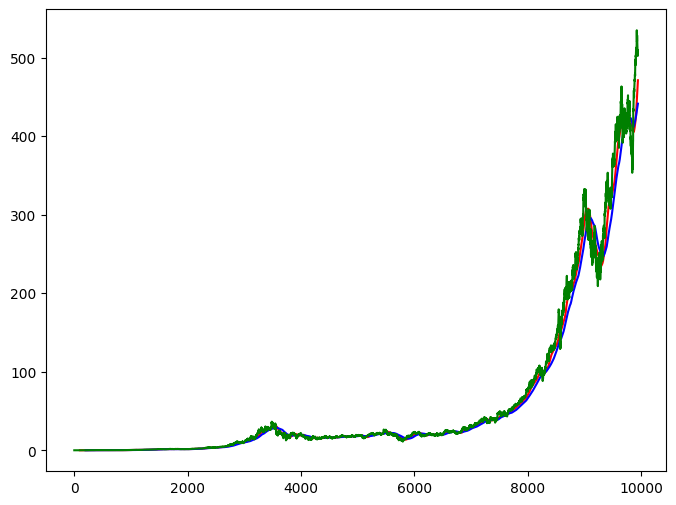

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [14]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [15]:
print ("Train data : ", data_train.shape[0], " rows | Test data: ", data_test.shape[0], " rows")

Train data :  7956  rows | Test data:  1989  rows


In [16]:
#

scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
#

data_train_scale = scaler.fit_transform(data_train)

In [18]:
#

x_train = []
y_train  = []

for i in range(100, data_train_scale.shape[0]):
    x_train .append(data_train_scale[i-100:i])
    y_train .append(data_train_scale[i,0])
x_train , y_train  = np.array(x_train ), np.array(y_train )

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
#Model definition

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [21]:
#Compile model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
#Model fiting

model.fit(x_train,y_train, epochs = 35, batch_size =32, verbose =1)

Epoch 1/35

246/246 [==============================] - 61s 231ms/step - loss: 0.0077
Epoch 2/35
246/246 [==============================] - 49s 199ms/step - loss: 0.0027
Epoch 3/35
246/246 [==============================] - 54s 221ms/step - loss: 0.0023
Epoch 4/35
246/246 [==============================] - 43s 175ms/step - loss: 0.0020
Epoch 5/35
246/246 [==============================] - 50s 204ms/step - loss: 0.0018
Epoch 6/35
246/246 [==============================] - 52s 213ms/step - loss: 0.0017
Epoch 7/35
246/246 [==============================] - 52s 212ms/step - loss: 0.0016
Epoch 8/35
246/246 [==============================] - 54s 221ms/step - loss: 0.0017
Epoch 9/35
246/246 [==============================] - 52s 213ms/step - loss: 0.0016
Epoch 10/35
246/246 [==============================] - 56s 229ms/step - loss: 0.0014
Epoch 11/35
246/246 [==============================] - 50s 202ms/step - loss: 0.0014
Epoch 12/35
246/246 [==============================] - 71s 290ms/step - l

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
pas_100_days = data_train.tail(100)

In [25]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [26]:
data_test_scale  =  scaler.fit_transform(data_test)

In [27]:
x_test = []
y_test = []

for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [28]:
y_predict = model.predict(x_test)

63/63 [==============================] - 9s 99ms/step


In [29]:
scale =1/scaler.scale_
y_predict = y_predict*scale
y_test = y_test *scale

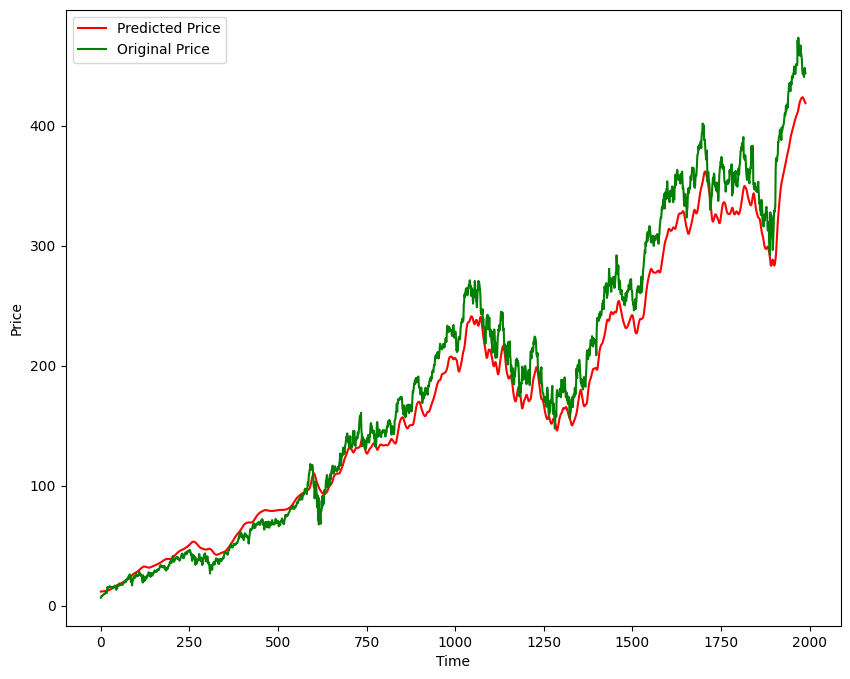

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y_test, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
path="predict-stock-market.pth"
torch.save(model, path)

In [35]:
model.save("StockPredictionModel.keras")